<a href="https://colab.research.google.com/github/pranavkakkad/Song-Identification/blob/master/Collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

In [4]:
name = ["user_id","song_id","count"]
text_df = pd.read_csv("/content/drive/MyDrive/song_Dataset/10000.txt",header=None,sep="\t",names=name)


In [5]:
text_df.head()

,user_id,song_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [6]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   song_id  object
 2   count    int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [7]:
print("number of unique user: {}".format(len(text_df["user_id"].unique())))
print("number of uniqu songs in our dataset {}".format(len(text_df["song_id"].unique())))

number of unique user: 76353
number of uniqu songs in our dataset 10000


In [8]:
print("average times user listen to same song: {}".format(np.mean(np.array(text_df["count"]))))

average times user listen to same song: 3.0454845


In [9]:
song_df = pd.read_csv("/content/drive/MyDrive/song_Dataset/song_data.csv")

In [10]:
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [11]:
print("total lenght of songs in dataframe",len(song_df["song_id"].to_numpy()))
print("Unique number of song id in dataframe",len(song_df["song_id"].unique()))

total lenght of songs in dataframe 1000000
Unique number of song id in dataframe 999056


In [12]:
#there are duplicates song id in 
song_df.drop_duplicates(["song_id"],inplace=True)

In [13]:
print("After removing duplicates entries:")
print("total lenght of songs in dataframe",len(song_df["song_id"].to_numpy()))
print("Unique number of song id in dataframe",len(song_df["song_id"].unique()))

After removing duplicates entries:
total lenght of songs in dataframe 999056
Unique number of song id in dataframe 999056


In [14]:
merge_df = pd.merge(text_df,song_df,on ="song_id",how="left")

In [15]:
merge_df.head()

,user_id,song_id,count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [16]:
print("Entries in data set",merge_df.shape[0])

Entries in data set 2000000


In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   count        int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [18]:
print("number of different song id",len(merge_df["song_id"].unique()))
print("number of unique title songs",len(merge_df["title"].unique()))
print("number of unique users ",len(merge_df["user_id"].unique()))

number of different song id 10000
number of unique title songs 9567
number of unique users  76353


In [19]:
print("analysis of each song_id")
print(merge_df.groupby("song_id").count())

analysis of each song_id
                    user_id  count  title  release  artist_name  year
song_id                                                              
SOAAAGQ12A8C1420C8       66     66     66       66           66    66
SOAACPJ12A81C21360      147    147    147      147          147   147
SOAACSG12AB018DC80       67     67     67       67           67    67
SOAAEJI12AB0188AB5       62     62     62       62           62    62
SOAAFAC12A67ADF7EB      190    190    190      190          190   190
...                     ...    ...    ...      ...          ...   ...
SOZZTNF12A8C139916      270    270    270      270          270   270
SOZZVWB12AB0189C30      138    138    138      138          138   138
SOZZWZV12A67AE140F      119    119    119      119          119   119
SOZZYAO12A6701FF36       76     76     76       76           76    76
SOZZZPV12A8C1444B5       71     71     71       71           71    71

[10000 rows x 6 columns]


In [20]:
print("number of times each song is listend by all the users")
print(merge_df.groupby("title")["count"].count().sort_values(ascending=False).reset_index())


number of times each song is listend by all the users
                               title  count
0                      Sehr kosmisch   8277
1                               Undo   7032
2     Dog Days Are Over (Radio Edit)   6949
3                     You're The One   6729
4                            Revelry   6145
...                              ...    ...
9562                          Scared     51
9563            Historia Del Portero     51
9564              Don´t Leave Me Now     50
9565             No Creo En El Jamas     48
9566      Ghosts (Toxic Avenger Mix)     48

[9567 rows x 2 columns]


In [21]:
popular_songs = pd.DataFrame(merge_df.groupby("title")["count"].count().sort_values(ascending=False)).reset_index()

In [22]:
top_20_songs = popular_songs["title"].to_list()[:20]
top_20_count = popular_songs["count"].to_list()[:20]

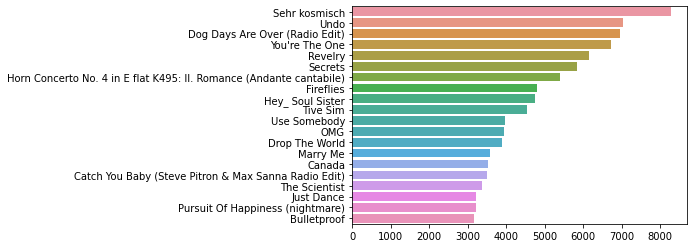

In [23]:
sns.barplot(x =top_20_count, y=top_20_songs )
sns.set(rc={'figure.figsize':(15,10)})

In [24]:
popular_artist = pd.DataFrame(merge_df.groupby("artist_name")["count"].count().sort_values(ascending=False)).reset_index()

In [25]:
popular_artist_name = popular_artist["artist_name"].to_list()[:20]
popular_artist_count = popular_artist["count"].to_list()[:20]

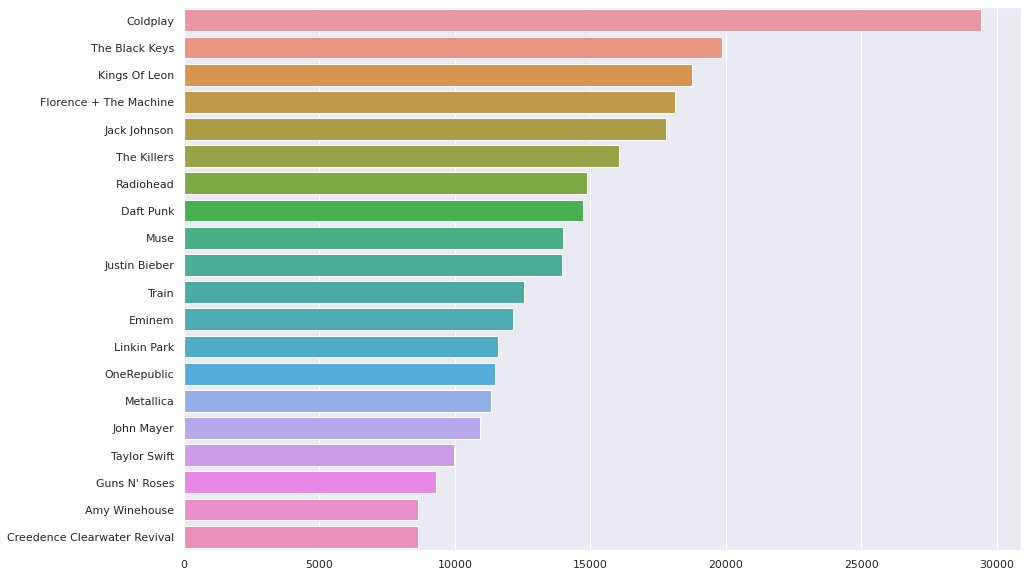

In [26]:
sns.barplot(x =popular_artist_count, y=popular_artist_name )
sns.set(rc={'figure.figsize':(15,10)})

In [27]:
songs_year = pd.DataFrame(merge_df.groupby("year")["count"].count().sort_values(ascending=False)).reset_index()

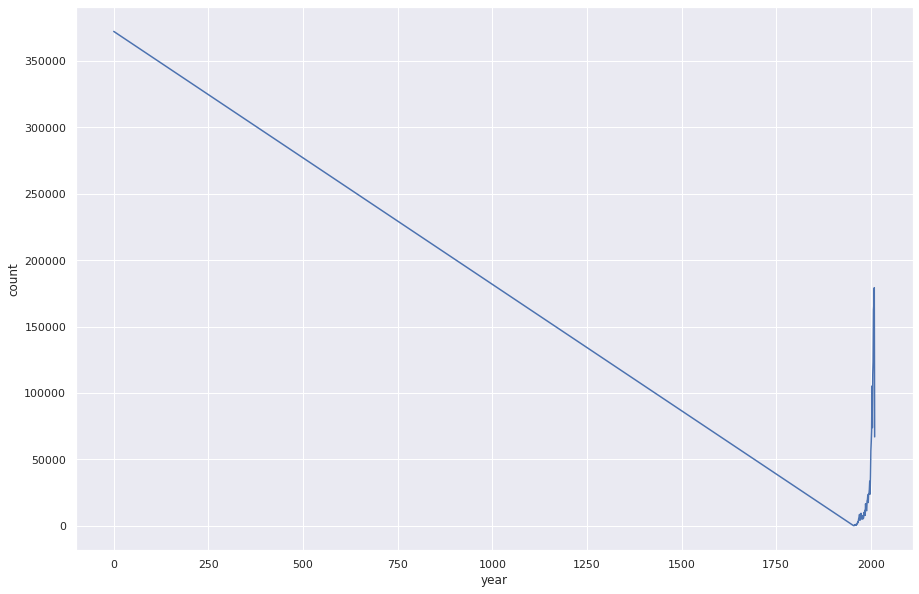

In [28]:
sns.lineplot(data=songs_year, x="year", y="count")

Year data does not give much meaningful data because if some inaccurate data though we can understand that there is decline in listening of music and after some point there is again increase in all users listening to songs in that year, though this graph is somewhat skeptical and much informatin cannot be extracted.


In [29]:
print("median count of number of times songs are heard ",np.median(merge_df["count"]))
print("mean of number of times song is heard ",np.mean(merge_df["count"]))
print("75 percentile of users listens to song {} times".format(np.percentile(merge_df["count"], [75])))


median count of number of times songs are heard  1.0
mean of number of times song is heard  3.0454845
75 percentile of users listens to song [3.] times


more than 50% percent of people listens to song one time, we can say that they are trying the new song.

User wise aggregation 

In [30]:
user_df_pd = (merge_df.groupby("user_id")["song_id"]).count()
user_df = user_df_pd.reset_index()

In [31]:
user_df.head()

,user_id,song_id
0,00003a4459f33b92906be11abe0e93efc423c0ff,7
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,5
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,9
3,0007235c769e610e3d339a17818a5708e41008d9,10
4,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,9


{'boxes': [<matplotlib.lines.Line2D at 0x7f6790982110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f679099b510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f67909634d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6790963110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6790982a10>,
  <matplotlib.lines.Line2D at 0x7f6790982590>]}

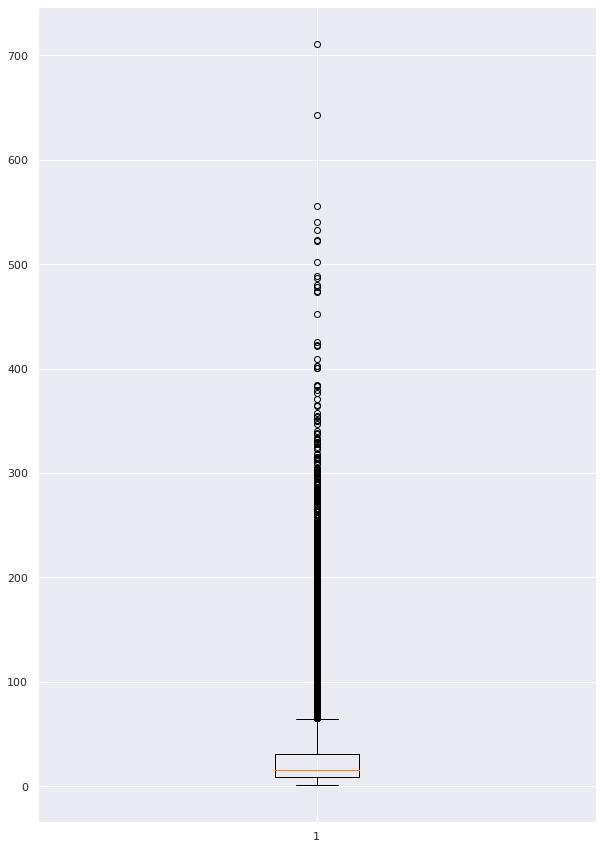

In [32]:
fig = plt.figure(figsize =(10, 15))
plt.boxplot(user_df["song_id"])

In [33]:
print("Average number of time of user listen to song ",np.mean(user_df["song_id"]))
print("Median number of time, user listens to same song ", np.median(user_df["song_id"]))
print("number of users listening to song more than median number of times ",len(user_df[user_df["song_id"]>np.median(user_df["song_id"])].to_numpy()))
print("Maximum time a user listens to this song ",np.max(user_df["song_id"]))
print("standard deviation of user listening to tthe song ",np.std(user_df["song_id"]))
print("25th percentile ",np.percentile(user_df["song_id"], 25))

Average number of time of user listen to song  26.194124657839247
Median number of time, user listens to same song  16.0
number of users listening to song more than median number of times  36561
Maximum time a user listens to this song  711
standard deviation of user listening to tthe song  31.624871108843738
25th percentile  9.0


In [34]:
user_threshold = user_df_pd[user_df_pd > 16].index.to_list()

In [35]:
user_df_threshold = merge_df[merge_df['user_id'].isin(user_threshold)].reset_index(drop=True)

In [86]:
user_df_threshold.head()

,user_id,song_id,count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [37]:
user_song = user_df_threshold.pivot(index='song_id', columns='user_id', values='count').fillna(0)

In [38]:
user_song.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,002543003041db1d049206b09426d5cdffc0f451,0028292aa536122c1f86fd48a39bd83fe582d27f,00292cf9c6d6e99c5ddbece7e37f957ab1362d25,00296f66ed7fb84c876486aecc9fab2d5809576d,0030822badc23ef6500a72ce7feda1c63faf2262,0031572620fa7f18487d3ea22935eb28410ecc4c,003412e33eb3d05573f7811c1ba61d6a15be5690,00342a0cdf56a45465f09a39040a5bc25b7d0046,00388e5764c59488ec06a109c88b39f59a2b6361,0039bd8483d578997718cdc0bf6c7c88b679f488,003ac50a4e6ed0c9085fecb7a1738730e7ea4942,003bfb50126f91f6389aaee733f5b3e0a8d5cbe0,003d0f3aac94fd261bb74c0124a90750579972d4,003d21762b29fe2ffe20fb9a51eb1e02ebeb3242,003d6d799d58e1fce362f5f4f6c7bcc26c8f3546,003e3919f41dbb8ff05a75623d205f6abcede4fc,003f1064ed75d1156352cd89b25fb752bcc10b13,003f1e939952a57d1a5bc990727acad5ceea97b4,00409f6a83c2bf4299ab6ae2dea958050537b5a9,0041925615557845642a7b1257fdc6229fe1ee5d,00454c72c0b4b99f9cc81ba0b1989597a43669d6,0045c60d98ced5efb3cbf1e0b4b7de1da3f1a506,00488ec44caa0d2fa669780f8cb604bf39e94392,004c7be9336ca88824e1e0b09ef9a2168200fa33,004dc9f93f5ad4a75f9a3ba0da5dd887b31d6bd2,004f6065fa9840913f62e52d94d9c29ea1d26fe1,004fcdf8829d68f4e45ef846ad9f308c4493ed8e,0051a2e7b452e3dc67f48688442032df557897f4,00544d8bde0d7985e8d703c1eb676d41cad33c67,00546de8971645143eead323561d0298d5b0f2be,...,ffb63da2222280f299a7a896edea073728aab343,ffb7096f3eeee706825b4a8c3fab98ce0e0b4216,ffb8299fcb3f31716c93fb8a77dee0d1dbb210f9,ffba3563fd590a51dabc1dfcb8a27119e6035241,ffbc58b89c81227a08ee05d90259bdd9172b9479,ffbe437f18c3bea5c78596c5f3183ee62d440b6c,ffc2563e7dd136bf371371cd21f0cc404a1d7499,ffc564b85d81f0ea427cee3eea2415cc2fc5c4be,ffc5b3bd0575330eb8c4ae4f3b9cabd3ba315dbb,ffc66b4520671da6b2a67a0326201565160d9650,ffc9966885909a0b42493b2558be9dc451317488,ffcc2cff250ea22471df09e76f59e2be0debae72,ffcfb0b34a47fdf55b3d96c1799cd196677f8261,ffd1d617221f5bf00de80ee3eb5d2a17fc8d077d,ffd25d7da8b4e54ea2cde25dd3b52d0e0aef7a5d,ffd458f903d49854685cf4540245c1d297e8bafa,ffd6f34b343cee62cd7dbbf20fb1ab1119b299e5,ffda2736b2204ece3b19e941caacad4106d00ed5,ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,ffdb5557e4e24da051ebd6b45ec18c524c55dc40,ffdbaeb5cf2081eb34053a655c20f57524de11ba,ffde97c0d23bf5ce249ce73e630ccb4e7293cc32,ffe2a7e7b6689071f8c699d944b52ce590ae4636,ffe33dce4e652a4dc4824cc39680a9f709cfdfb3,ffebfec313fd515a11faba060b022f030b57fac0,ffecbb84f3dde31b0b2e64d70b7b7e5092bf7427,ffef9c3e59ab44554a9775af5e3b2ac149111bb6,fff03efd1550136063389fa71125194614e1c68f,fff0b1ab076f0b71cbde9c7dcbcfca400708d845,fff22417a61c1ba3ee2592b22a052ed6a27a8e91,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [39]:
user_song.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
user_song_sparse = csr_matrix(user_song.values)

In [41]:
user_song_sparse

<10000x36561 sparse matrix of type '<class 'numpy.float64'>'
	with 1635302 stored elements in Compressed Sparse Row format>

In [42]:
df_unique_songs = merge_df.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [43]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[user_song.index].title))
}

In [44]:
from sklearn.neighbors import NearestNeighbors

In [45]:
 k_neighbor = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20, n_jobs=-1).fit(user_song_sparse)

In [46]:
text_df.head()

,user_id,song_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [47]:
# def to_rating(count):
#   if count<=1:
#     return 1
#   elif count>1 and count<=2:
#     return 2
#   elif count>2 and count<=3:
#     return 3
#   elif count>3 and count<=4:
#     return 4
#   elif count>5:
#     return 5

In [48]:
# text_df["rating"] = text_df["count"].apply(lambda x: to_rating(int(x)))

In [49]:
# text_df = text_df.drop("count",axis=1)
# text_df.head()

In [60]:
text_df_temp = text_df.head(10000)
text_df_temp.columns = ['userID', 'itemID', 'rating']
# text_df_temp = text_df_temp[name = names]
text_df_temp.head()

,userID,itemID,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [61]:
text_df.columns = ['userID', 'itemID', 'rating']
text_df.head()

,userID,itemID,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


#Surprise Package

In [52]:
!pip3 install surprise

     |████████████████████████████████| 11.8 MB 48 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617769 sha256=3da0ac1bf7f3f070362b2c07da61d39f9ed761d2a8b9b11fa1e155a6df21b478
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [53]:
from surprise import Reader,Dataset

In [62]:
data = Dataset.load_from_df(text_df,Reader(rating_scale=(1,5)))
# data.split(n_folds=5)

In [63]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [56]:
# param_grid = {'lr_all':[0.002,0.05],'reg_all':[0.4,0.6]}
# grid_search = GridSearchCV(SVD,param_grid,measures=["RMSE","MAE"],cv=5)
# grid_search.fit(data)

In [57]:
# algo = SVD()

# # Run 5-fold cross-validation and then print results
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


In [94]:
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(text_df_temp[['userID', 'itemID', 'rating']], reader)
# trainSet, testSet = train_test_split(data, test_size=.25, random_state=0)
# algo = SVD(random_state=0)
# algo.fit(trainSet)
# predictions = algo.test(testSet)

# def MAE(predictions):
#         return accuracy.mae(predictions, verbose=False)
# def RMSE(predictions):
#         return accuracy.rmse(predictions, verbose=False)
    
# print("RMSE: ", RMSE(predictions))
# print("MAE: ", MAE(predictions))

RMSE:  4.515332672976171
MAE:  2.093177970861536


In [58]:
benchmark = []
# for algorithm in [SVD(), NMF(), KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly()]:
# print("ALGO name", algorithm )
# results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=True)
# tmp = pd.DataFrame.from_dict(results).mean(axis=0)
# tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
# benchmark.append(tmp)

In [59]:
results = cross_validate(SVD(), data, measures=['RMSE','MAE'], cv=5, verbose=True)
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(SVD()).split(' ')[0].split('.')[-1]], index=['Algorithm']))
benchmark.append(tmp)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    6.5621  7.0425  6.7582  7.4152  6.4998  6.8556  0.3377  
MAE (testset)     3.9135  3.9214  3.9017  3.9116  3.8858  3.9068  0.0122  
Fit time          112.71  112.17  113.47  112.77  116.26  113.48  1.45    
Test time         8.92    8.93    8.83    8.64    8.96    8.85    0.12    


In [60]:
results = cross_validate(NMF(), data, measures=['RMSE','MAE'], cv=5, verbose=True)
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(NMF()).split(' ')[0].split('.')[-1]], index=['Algorithm']))
benchmark.append(tmp)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    6.2926  6.4524  6.2688  7.0815  6.0599  6.4311  0.3484  
MAE (testset)     2.1567  2.1611  2.1619  2.1709  2.1627  2.1627  0.0046  
Fit time          154.86  155.83  157.56  155.73  158.80  156.55  1.43    
Test time         8.21    8.14    8.08    8.08    8.08    8.11    0.05    


In [61]:
results = cross_validate(BaselineOnly(), data, measures=['RMSE','MAE'], cv=5, verbose=True)
tmp = pd.DataFrame.from_dict(results).mean(axis=0)
tmp = tmp.append(pd.Series([str(BaselineOnly()).split(' ')[0].split('.')[-1]], index=['Algorithm']))
benchmark.append(tmp)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    5.9845  6.5261  7.0628  6.0801  6.0431  6.3393  0.4097  
MAE (testset)     2.2772  2.2841  2.2777  2.2709  2.2634  2.2747  0.0070  
Fit time          17.01   18.27   18.67   18.36   18.79   18.22   0.63    
Test time         7.68    7.25    7.40    7.18    7.23    7.35    0.18    


In [62]:
benchmark

[test_rmse    6.85557
 test_mae     3.90678
 fit_time     113.477
 test_time    8.85473
 Algorithm        SVD
 dtype: object, test_rmse    6.43105
 test_mae     2.16266
 fit_time     156.555
 test_time    8.11486
 Algorithm        NMF
 dtype: object, test_rmse         6.33932
 test_mae          2.27469
 fit_time          18.2201
 test_time         7.34989
 Algorithm    BaselineOnly
 dtype: object]

In [63]:
algo_Results = pd.DataFrame(benchmark).set_index("Algorithm").sort_values("test_rmse")

In [65]:
algo_Results.to_csv("/content/drive/MyDrive/algo_result.csv")

In [56]:
algo_Results = pd.read_csv("/content/drive/MyDrive/algo_result.csv")

In [57]:
algo_Results.head()

,Algorithm,test_rmse,test_mae,fit_time,test_time
0,BaselineOnly,6.339318,2.274690,18.220139,7.349895
1,NMF,6.431054,2.162662,156.554848,8.114863
2,SVD,6.855565,3.906780,113.476743,8.854725


In [72]:
#Baseline is the best model that can be used to predict from the goven data
bsl_options = {'method':'als', 'n_epochs':10,'reg_u':12,'reg_i':5}

Baseline_model = BaselineOnly(bsl_options=bsl_options)
cross_validate(Baseline_model,data,measures=["RMSE","MAE"],cv=8,verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'fit_time': (17.482353687286377,
  19.275850296020508,
  19.43355965614319,
  19.476083755493164,
  19.174111127853394,
  18.969635486602783,
  19.383749961853027,
  19.441040515899658),
 'test_mae': array([2.232801  , 2.25912339, 2.25268783, 2.23991069, 2.26288627,
        2.25891531, 2.25582528, 2.24834953]),
 'test_rmse': array([6.18300749, 6.15719847, 6.12244618, 5.72245975, 6.33073142,
        6.76285824, 7.30368122, 6.06858977]),
 'test_time': (5.059303522109985,
  3.904162645339966,
  4.032511234283447,
  5.030643939971924,
  4.000767230987549,
  3.959017753601074,
  3.9950034618377686,
  5.0114710330963135)}

In [124]:
# train,test = train_test_split(data,test_size=0.2)
# bsl_options = {'method':'als', 'n_epochs':10,'reg_u':12,'reg_i':5}

# Baseline_model = BaselineOnly(bsl_options=bsl_options)
# pred  =Baseline_model.fit(train).test(test)
# accuracy.mae(pred)

In [59]:
from collections import defaultdict

In [123]:
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [64]:
train,test = train_test_split(data,test_size=0.2)
bsl_options = {'method':'als', 'n_epochs':10,'reg_u':12,'reg_i':5}

Baseline_model = BaselineOnly(bsl_options=bsl_options)
Baseline_model.fit(train)
pred = Baseline_model.test(test)
accuracy.mae(pred)

Estimating biases using als...
MAE:  2.2547


2.2547106685535105

In [66]:
top_n = get_top_n(pred, n=10)

In [83]:
uid_list = []
for uid, user_ratings in top_n.items():
  # print(uid, [iid for (iid, _) in user_ratings])
  uid_list.append(uid)

In [84]:
#Enter user id:
input_user_id = "398f9bff0c6aa86ea0683542dcc1f813c5e9f9fd"

In [122]:
print("Song recommended for given user is/are: with predicted rating")
for (iid, rating) in top_n[input_user_id]:
  print("{}\t{}".format(user_df_threshold[user_df_threshold["song_id"]==iid]["title"].tolist()[0],rating))
  # print(iid)

Song recommended for given user is/are: with predicted rating
Fast Car (LP Version)	3.9142941040332135
Sehr kosmisch	2.7605862852308127
Lucky (Album Version)	2.3445626719963597
Dirty Little Secret	1.9010532796083153
The Fear	1.6893418771845161
Gives You Hell	1.6025036139774862
One And Only	1.486861490650283
Just Missed The Train	1.3141057178875655
You Are Mine	1.225900913269017
One Kiss From You	1.0221668262291417
